## 3-qubit Toffoli gate implementation with 4 CNOT gates

Theorem 1 in reference [1] states that a circuit consisting of CNOT gates and one-qubit gates which implements n-qubit 
Toffoli gate without ancillae requires at least 2n CNOT gates.
For n=3 that would mean at least 6 CNOT gates.

In this notebook we demonstrate a possibility of constructing 3-qubit Toffoli gate with 4 CNOT gates.

Whether such implementation is optimal needs further investigation.

In the ToffoliGateExploration_qiskit_2_0_0.ipynb notebook this implementation is successfully executed on a real IBM quantum computer (ibm_torino).

Reference [2] provides a Toffoli gate overview.

[1] https://arxiv.org/abs/0803.2316

[2] https://en.wikipedia.org/wiki/Toffoli_gate#cite_note-13

From the reference [1]:
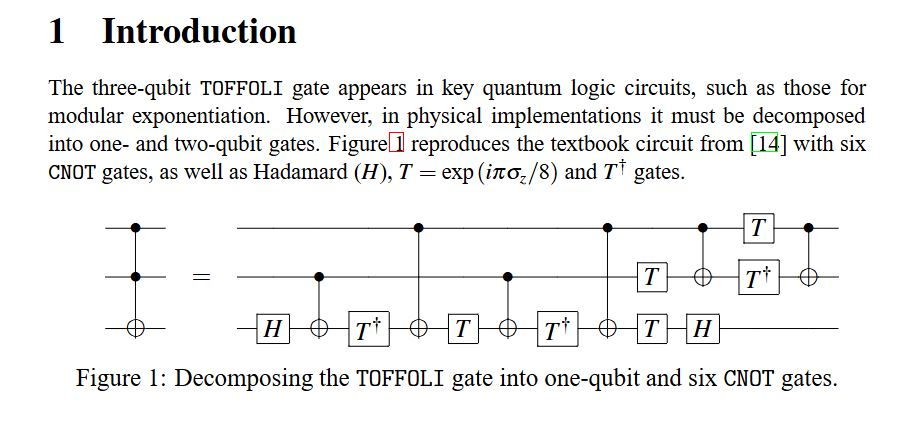

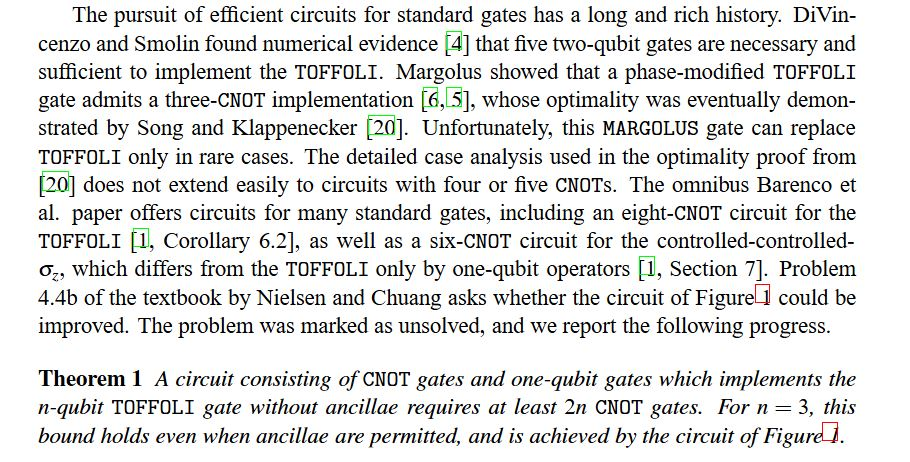

- Import needed libraries

In [1]:
import qiskit
print(qiskit.version.get_version_info())

C:\Users\slipo\anaconda3\envs\old_qiskit\lib\site-packages\qiskit\circuit\equivalence.py:18: DeprecationWarning: The retworkx package is deprecated and has been renamed to rustworkx. Rustworkx is a drop-in replacement and can be used by replacing `import retworkx` with import `rustworkx`. 
  import retworkx as rx
C:\Users\slipo\anaconda3\envs\old_qiskit\lib\site-packages\qiskit\version.py:20: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


0.18.1


In [2]:
%matplotlib
from qiskit import QuantumRegister, ClassicalRegister
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

Using matplotlib backend: <object object at 0x000002063E606F30>


Here we define a function that returns counts for ploting histogram of the measurement results. The input for the function is the backend type, for example 'qasm_simulator'.

In [3]:
from qiskit.tools.visualization import plot_histogram

def get_counts(back_end):
    ## First, simulate the circuit
    simulator = Aer.get_backend(back_end)
    job = execute(circuit, backend=simulator, shots=1000000)
    result = job.result()
    
    ## Then, plot a histogram of the results
    counts = result.get_counts(circuit)
    return counts

# 3-qubit Toffoli gate implementation with 4 CNOT gates (shown below between 2 barriers) 

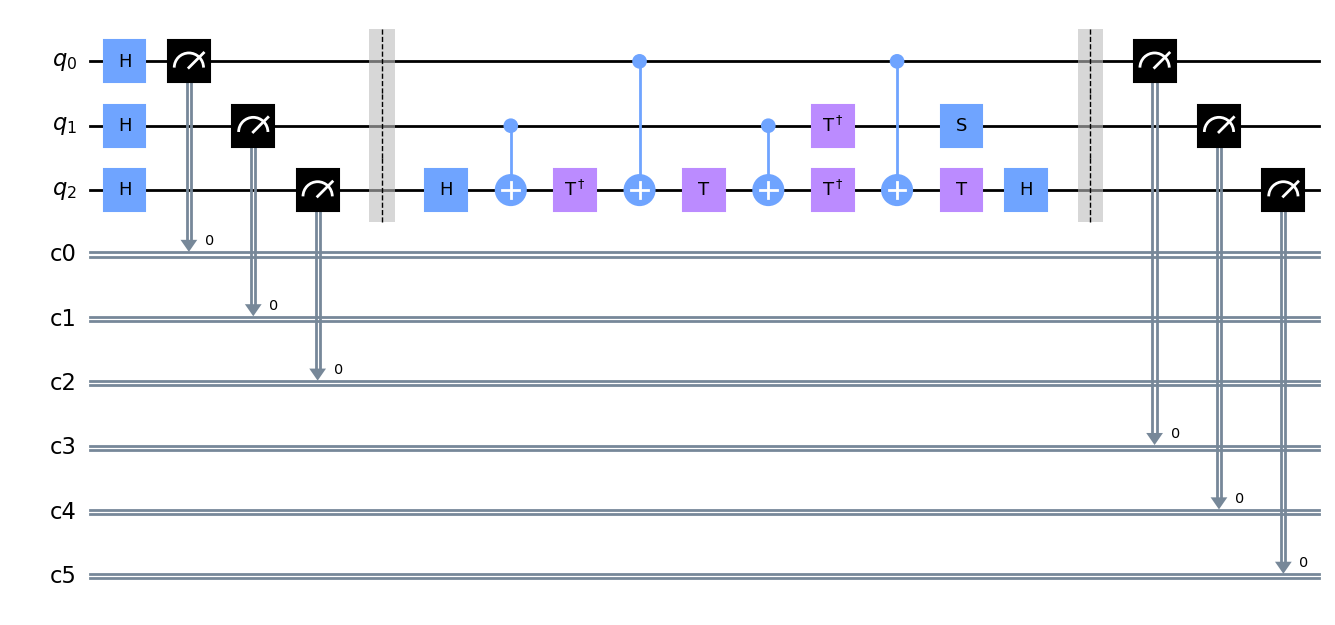

In [4]:
## Define a 3-qubit quantum circuit
q = QuantumRegister(3, 'q')
circuit = QuantumCircuit(q)
## We need also 6 classical registers
c = [ ClassicalRegister(1) for _ in range(6) ]
circuit = QuantumCircuit(q)
for register in c:
    circuit.add_register(register)

#initial state of an equal superposition of |0> and |1> states
circuit.h(q[0]) #Hadammard on q[0]
circuit.h(q[1]) #Hadammard on q[1]
circuit.h(q[2]) #Hadammard on q[2]

#measure q0, q1, and q2 before the Toffoli gate (to display the input values to the Toffoli gate)
circuit.measure(q[0], c[0])
circuit.measure(q[1], c[1])
circuit.measure(q[2], c[2])
circuit.barrier()

circuit.h(q[2]) #Hadammard on q[2]
circuit.cx(q[1],q[2]) #CNOT between q1 and q2
circuit.tdg(q[2]) #Hermitian conjugate T gate on q[2]
circuit.cx(q[0],q[2]) #CNOT between q0 and q2
circuit.t(q[2]) #T gate on q[2]
circuit.cx(q[1],q[2]) #CNOT between q1 and q2
circuit.tdg(q[1]) #Hermitian conjugate T gate on q[1]
circuit.tdg(q[2]) #Hermitian conjugate T gate on q[2]
circuit.cx(q[0],q[2]) #CNOT between q0 and q2
circuit.t(q[2]) #T gate on q[2]
circuit.s(q[1]) #S gate on q[1]
circuit.h(q[2]) #Hadammard on q[2]

circuit.barrier()

## Finish off with the measurements
circuit.measure(q[0], c[3])
circuit.measure(q[1], c[4])
circuit.measure(q[2], c[5])

## Draw the circuit
circuit.draw(output="mpl")

In [5]:
counts = get_counts('qasm_simulator')

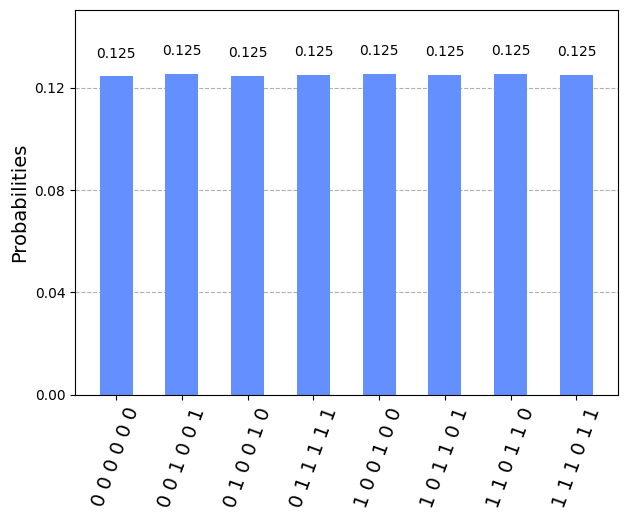

In [6]:
plot_histogram(counts)

In [7]:
counts

{'1 1 1 0 1 1': 124916,
 '1 0 1 1 0 1': 125036,
 '1 0 0 1 0 0': 125299,
 '0 0 0 0 0 0': 124510,
 '0 0 1 0 0 1': 125406,
 '1 1 0 1 1 0': 125334,
 '0 1 0 0 1 0': 124526,
 '0 1 1 1 1 1': 124973}

In [8]:
sorted_counts = dict(sorted(counts.items()))
sorted_counts

{'0 0 0 0 0 0': 124510,
 '0 0 1 0 0 1': 125406,
 '0 1 0 0 1 0': 124526,
 '0 1 1 1 1 1': 124973,
 '1 0 0 1 0 0': 125299,
 '1 0 1 1 0 1': 125036,
 '1 1 0 1 1 0': 125334,
 '1 1 1 0 1 1': 124916}

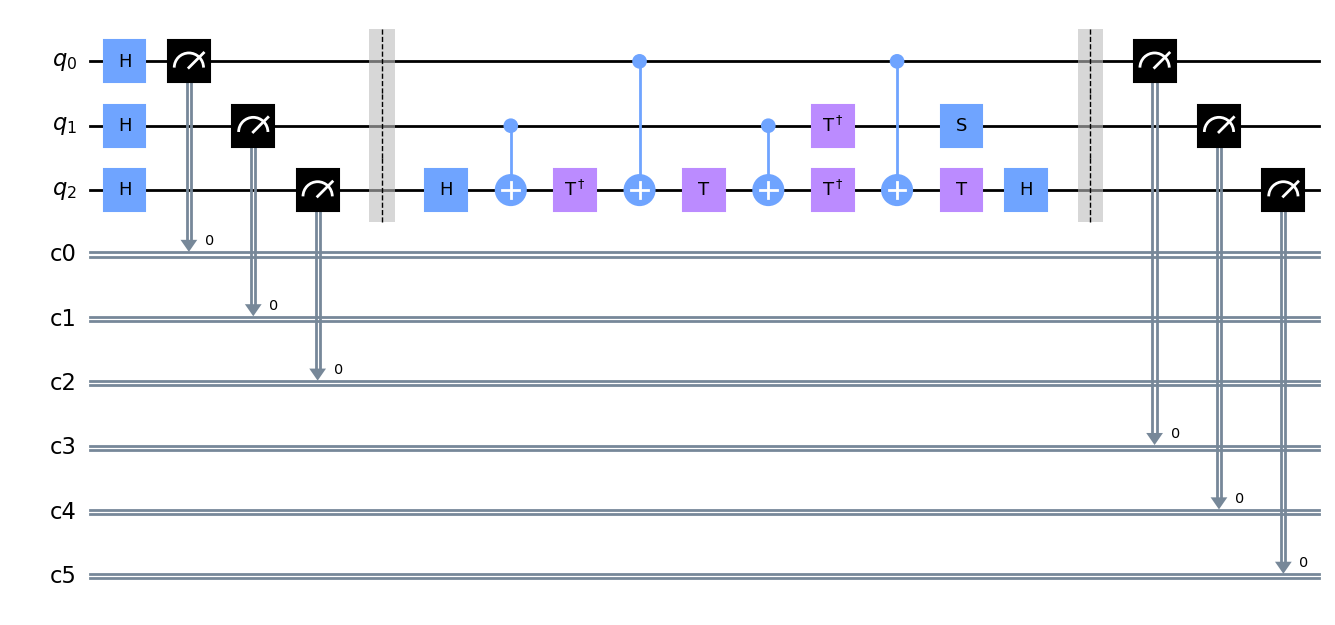

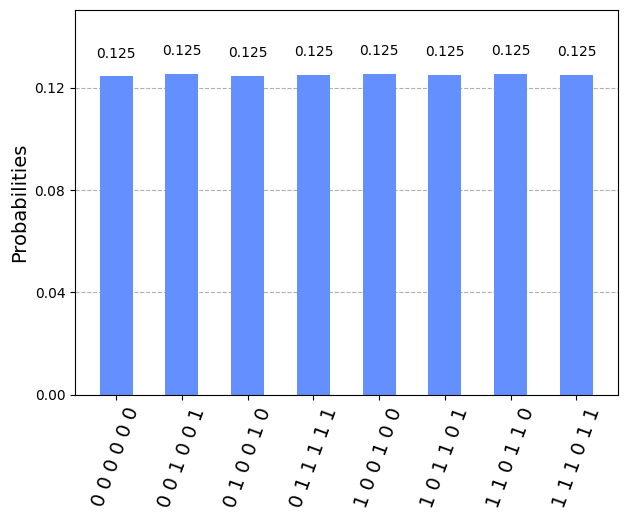

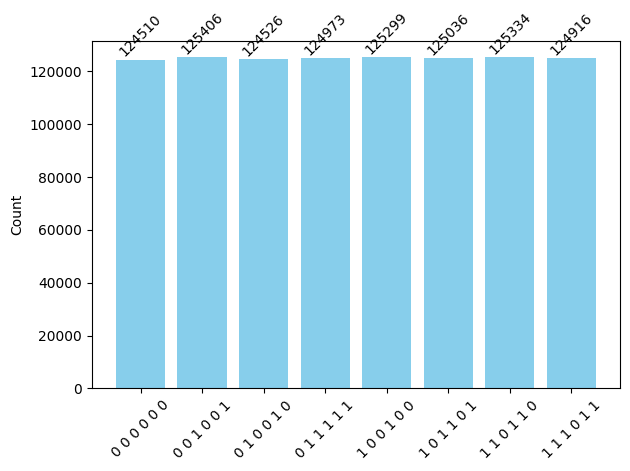

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# Sample data
sorted_counts = dict(sorted(counts.items()))
categories = list(sorted_counts.keys())
values = list(sorted_counts.values())

# Create bar chart
fig, ax = plt.subplots()
bars = ax.bar(categories, values,color='skyblue')
plt.ylabel('Count')

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom', rotation=45)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

As we can see the Toffoli gate behavior is demonstrated. 

The q2 qubit state is flipped only when both q0 and q1 qubits are in the state |1>.

In green we mark input qubit states, respectively q0, q1, and q2.

In yellow we mark output qubit states, respectively q0, q1, and q2.
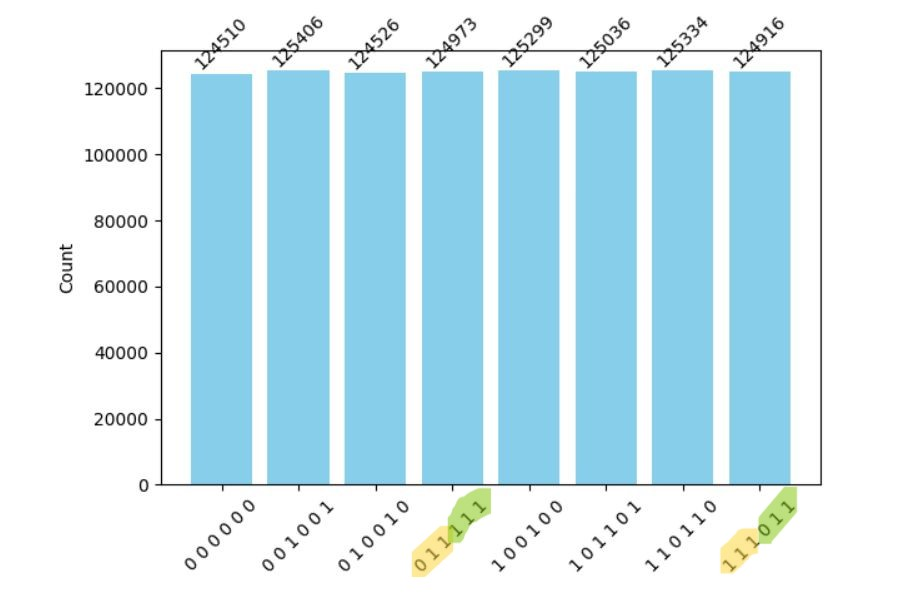

- Comparison with the current qiskit implementation of the Toffoli gate which has 6 CNOT gates

Using matplotlib backend: tkagg


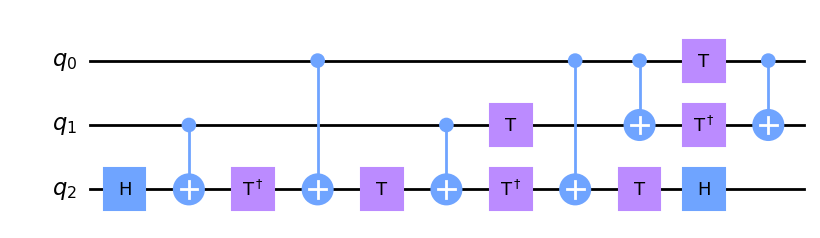

In [10]:
%matplotlib
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)
qc.decompose().draw("mpl")

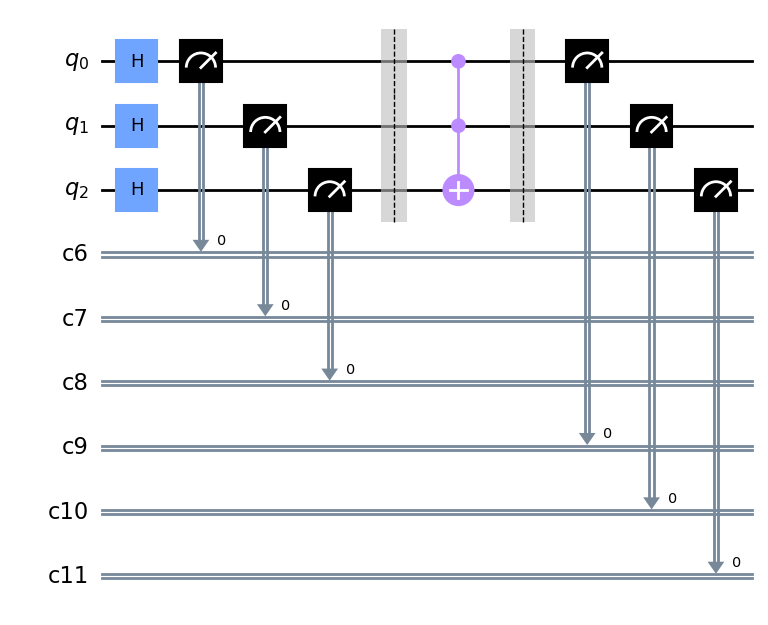

In [11]:
## Define a 3-qubit quantum circuit
q = QuantumRegister(3, 'q')
circuit = QuantumCircuit(q)
## We need also 6 classical registers
c = [ ClassicalRegister(1) for _ in range(6) ]
circuit = QuantumCircuit(q)
for register in c:
    circuit.add_register(register)

#initial state of an equal superposition of |0> and |1> states
circuit.h(q[0]) #Hadammard on q[0]
circuit.h(q[1]) #Hadammard on q[1]
circuit.h(q[2]) #Hadammard on q[2]

#measure q0, q1, and q2 before the Toffoli gate (to display the input values to the Toffoli gate)
circuit.measure(q[0], c[0])
circuit.measure(q[1], c[1])
circuit.measure(q[2], c[2])
circuit.barrier()

circuit.ccx(0, 1, 2)
circuit.barrier()

## Finish off with the measurements
circuit.measure(q[0], c[3])
circuit.measure(q[1], c[4])
circuit.measure(q[2], c[5])

## Draw the circuit
circuit.draw(output="mpl")

In [12]:
counts = get_counts('qasm_simulator')

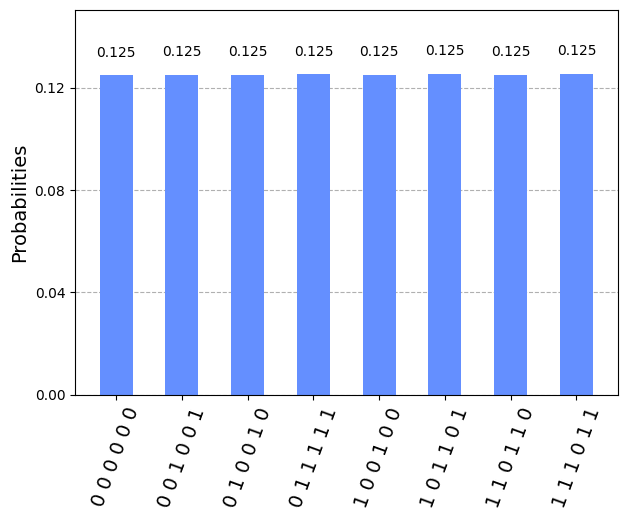

In [14]:
plot_histogram(counts)